<a href="https://colab.research.google.com/github/ElMermelaa/Tareas_opt_dim/blob/main/Tarea_2_opti_dim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# P1

## a)

### aproximacion del gradiente


In [ ]:
def appr_grad(f,x):
    x = np.array(x)
    h = 1e-4

    grad_f = np.zeros_like(x)
    i=0
    for i in range(len(x)):
        grad_f_i = f(x + h*np.eye(len(x))[i]) - f(x - h*np.eye(len(x))[i])
        grad_f_i = grad_f_i/(2*h)
        grad_f[i] = grad_f_i
        i+=1
    return grad_f

### test

In [ ]:
## test
def f1(z):
    x, y = z
    return  (1 - x)**2 + 100*(y - x**2)**2
def f2(h):
    x, y, z = h
    return np.sin(x*z+y)

points = {
    'a_1': [3, 1],
    'b_1': [0, 1],
    'a_2': [1, 0, 1],
    'b_2': [3, 1, 2]
}

resultados = {}

for key, value in points.items():
    if len(value) == 2:
        gradient = appr_grad(f1, value)
    elif len(value) == 3:
        gradient = appr_grad(f2, value)

    resultados[key] = gradient

print("Resultados de la aporximacion:\n")
print("Puntos x*           |  Gradiente aproximado")
print("------------------------------------------")
for key, gradient in resultados.items():
    grad_str = " ".join(f"{g:.6f}" for g in gradient)
    print(f"{key:<19} | {grad_str}")

## calculo real
def grad_f1(z):
    x, y = z
    return [-2*(1-x)+200*(y-x**2)*(-2*x), 200*(y-x**2)]
def grad_f2(h):
    x, y, z = h
    return [np.cos(x*z+y)*z, np.cos(x*z+y), np.cos(x*z+y)*x]

for key, value in points.items():
    if len(value) == 2:
        gradient = grad_f1(value)
    elif len(value) == 3:
        gradient = grad_f2(value)

    resultados[key] = gradient

# Imprimir la nueva tabla
print("Resultados del calculo de los gradientes evaluados en *:\n")
print("Punto de evaluación |  Gradiente calculado")
print("------------------------------------------")
for key, gradient in resultados.items():
    grad_str = " ".join(f"{g:.6f}" for g in gradient)
    print(f"{key:<19} | {grad_str}")

Resultados de la aporximacion:

Puntos x*           |  Gradiente aproximado
------------------------------------------
a_1                 | 9604.000000 -1599.000000
b_1                 | -1.000000 199.000000
a_2                 | 0.000000 0.000000 0.000000
b_2                 | 1.000000 0.000000 2.000000
Resultados del calculo de los gradientes evaluados en *:

Punto de evaluación |  Gradiente calculado
------------------------------------------
a_1                 | 9604.000000 -1600.000000
b_1                 | -2.000000 200.000000
a_2                 | 0.540302 0.540302 0.540302
b_2                 | 1.507805 0.753902 2.261707


## b)

### backtracking

In [ ]:
## backtracking
def backtracking_ak(f,x_k,d_k,alpha=1, rho=1/2, c=1/2):
    x_k = np.array(x_k)
    d_k = np.array(d_k)
    while f(x_k + alpha * d_k)>f(x_k) + c* alpha *np.dot(appr_grad(f,x_k), d_k):
        alpha *= rho

    return alpha

# P2

##descenso del gradiente con backtracking

In [ ]:
def descent_grad(f,x, epsilon = 1e-4):
    x_k = np.array(x, dtype=float)
    k = 1
    safe = [[x_k.copy()], [f(x_k)]]

    while True:
      grad_f_xk = appr_grad(f,x_k)
      dk = -grad_f_xk
      alpha = backtracking_ak(f, x_k, dk)
      x_k1 = x_k + alpha*dk

      if np.linalg.norm(x_k1 - x_k) <= epsilon or np.linalg.norm(grad_f_xk) <= epsilon :
        break

      x_k = x_k1
      safe[0].append(x_k)
      safe[1].append(f(x_k))
      k += 1
    return  x_k, k, safe



## descenso sin backtracking

In [ ]:
def descent_grad_alpha(f,x, alpha =1e-3,  epsilon = 1e-4):
    x_k = np.array(x, dtype=float)
    k = 1
    safe = [[x_k.copy()], [f(x_k)]]

    while True:
      grad_f_xk = appr_grad(f,x_k)
      dk = -grad_f_xk
      x_k1 = x_k + alpha*dk

      if np.linalg.norm(x_k1 - x_k) <= epsilon or np.linalg.norm(grad_f_xk) <= epsilon :
        break

      x_k = x_k1
      safe[0].append(x_k)
      safe[1].append(f(x_k))
      k += 1
    return  x_k, k, safe


## a) graficos correspondientes

### f1, {xk,yk}

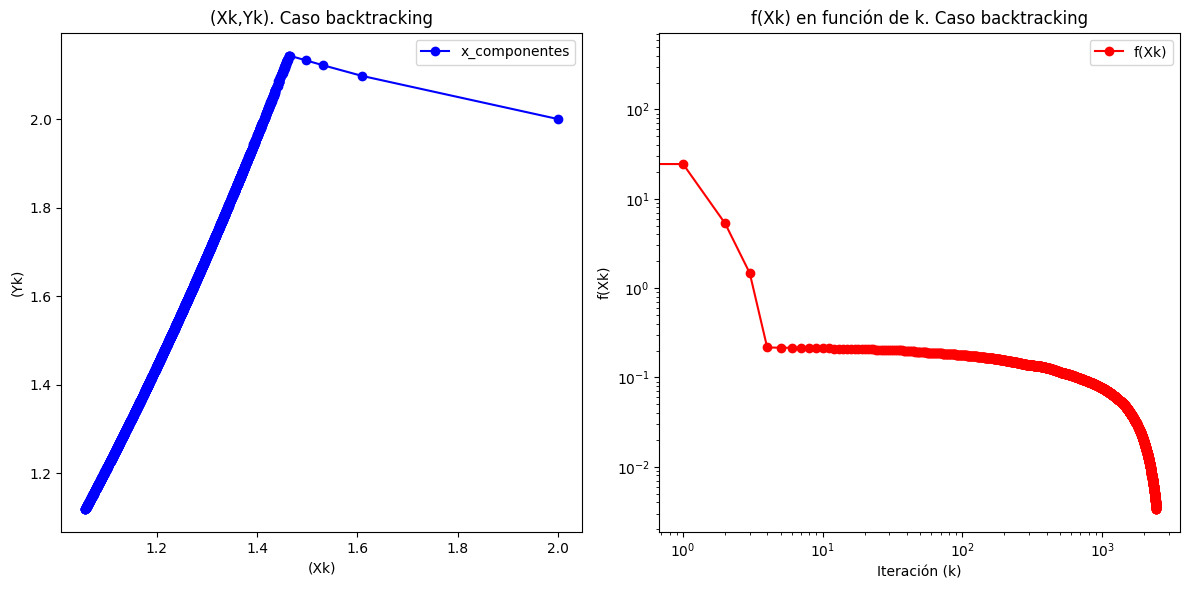

In [ ]:
x0 = [2,2]
x_k, k, data = descent_grad(f1,x0)
x_points = [point[0] for point in data[0]]
y_points = [point[1] for point in data[0]]
f_outpout = [point for point in data[1]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_points, y_points, marker='o', linestyle='-', color='b', label='x_componentes')
plt.xlabel('(Xk)')
plt.ylabel('(Yk)')
plt.title('(Xk,Yk). Caso backtracking')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(k), f_outpout, marker='o', linestyle='-', color='r', label='f(Xk)')
plt.xlabel('Iteración (k)')
plt.ylabel('f(Xk)')
plt.title('f(Xk) en función de k. Caso backtracking')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()


### f(xk), {xk,yk} sin backtracking

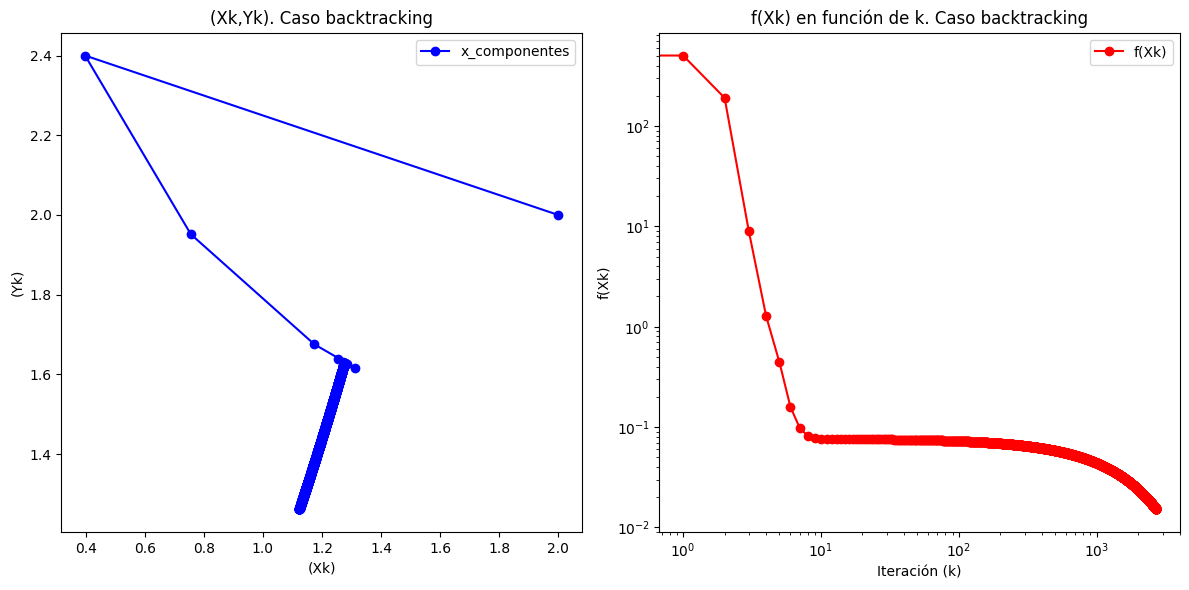

In [ ]:
x0 = [2,2]
x_k1, k1, data1 = descent_grad_alpha(f1,x0)
x_points = [point[0] for point in data1[0]]
y_points = [point[1] for point in data1[0]]
f_outpout = [point for point in data1[1]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_points, y_points, marker='o', linestyle='-', color='b', label='x_componentes')
plt.xlabel('(Xk)')
plt.ylabel('(Yk)')
plt.title('(Xk,Yk). Caso backtracking')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(k1), f_outpout, marker='o', linestyle='-', color='r', label='f(Xk)')
plt.xlabel('Iteración (k)')
plt.ylabel('f(Xk)')
plt.title('f(Xk) en función de k. Caso backtracking')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()

## B) minimizar f1 en 2 casos


puntos optimos del maximo descenso con backtracking [1.74930155 1.65236974 1.74930155] dando: -0.9999999993275365 con 6 iteraciones
puntos optimos del maximo descenso con backtracking [10.07568227 10.00757005 10.07568227] dando: -0.9999999183770346 con 5 iteraciones


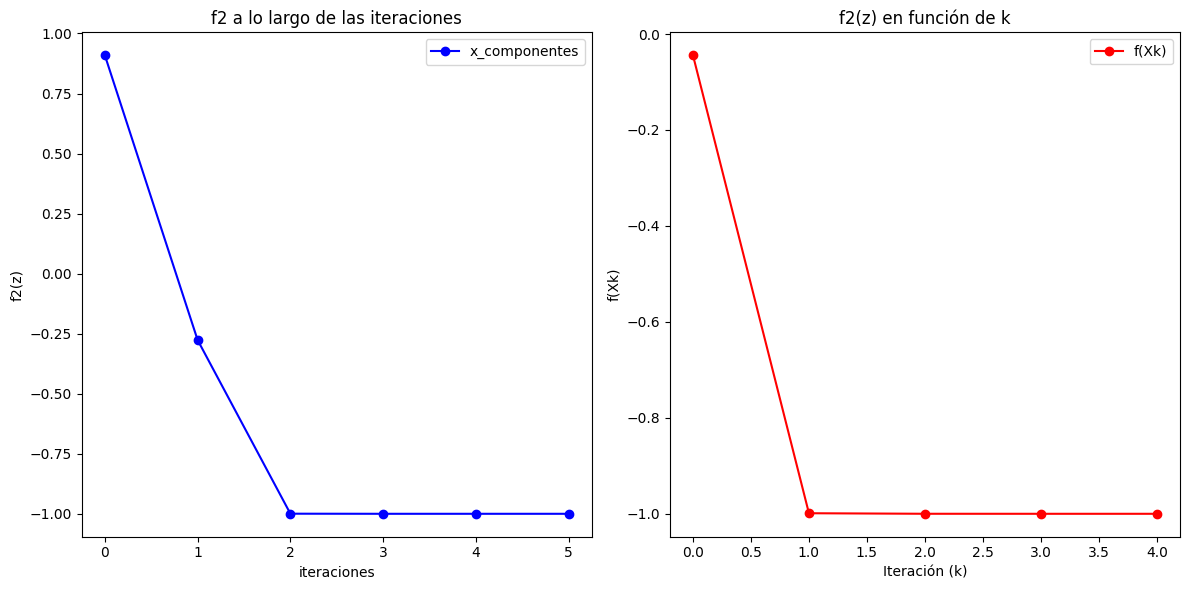

In [ ]:
### caso 1
x1 = [1,1,1]
u, iterations, compiled = descent_grad(f2,x1)
print('puntos optimos del maximo descenso con backtracking', u, 'dando:',f2(u), "con", iterations, 'iteraciones')
f2_uk = [points for points in compiled[1]]
iteraciones = range(iterations)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(iteraciones, f2_uk, marker='o', linestyle='-', color='b', label='x_componentes')
plt.xlabel('iteraciones')
plt.ylabel('f2(z)')
plt.title('f2 a lo largo de las iteraciones')
plt.legend()


### caso 2
x2 = [10,10,10]
u, iterations, compiled = descent_grad(f2,x2)
print('puntos optimos del maximo descenso con backtracking', u, 'dando:',f2(u), "con", iterations, 'iteraciones')
f2_uk = [points for points in compiled[1]]
iteraciones = range(iterations)

plt.subplot(1, 2, 2)
plt.plot(iteraciones, f2_uk, marker='o', linestyle='-', color='r', label='f(Xk)')
plt.xlabel('Iteración (k)')
plt.ylabel('f(Xk)')
plt.title('f2(z) en función de k')
plt.legend()
plt.tight_layout()
plt.show()

# P3


In [ ]:
def hessiana(f,x):
  h = 1e-4
  n = len(x)
  hess = np.zeros((n,n))
  i = 0
  j = 0
  x = np.array(x, dtype = float)
  for i in range(len(x)):
      for j in range(len(x)):
        ## derivadas segundas
        if i == j:
          x_sum = np.array(x, dtype = float)
          x_sum[i] += h

          x_low = np.array(x, dtype = float)
          x_low[i] -= h
          hess[i][j] = (f(x_sum) - 2*f(x) + f(x_low))/(h**2)

        ### derivadas cruzadas
        else:
          x_ij_sum = x.copy()
          x_ij_sum[i] += h
          x_ij_sum[j] += h

          x_i_sum_j_less = x.copy()
          x_i_sum_j_less[i] += h
          x_i_sum_j_less[j] -= h

          x_i_less_j_sum = x.copy()
          x_i_less_j_sum[i] -= h
          x_i_less_j_sum[j] += h

          x_ij_less = x.copy()
          x_ij_less[i] -= h
          x_ij_less[j] -= h

          hess[i,j] = (f(x_ij_sum) - f(x_i_sum_j_less) - f(x_i_less_j_sum)+f(x_ij_less))/(4*h**2)
  return hess
# test
def f(h):
  x, y, z =h
  return x**2 + y**2 + z**2
print(hessiana(f,[1,1,1]))


[[1.99999999 0.         0.        ]
 [0.         1.99999999 0.        ]
 [0.         0.         1.99999999]]


In [ ]:
x = [2,2]
print(hessiana(f1,x))

[[4002.00003128 -799.99999798]
 [-799.99999798  199.99998244]]


In [ ]:
def newton_method(f,xk):
  xk = np.array(xk, dtype = float)
  epsilon = 1e-4
  k = 1
  data  = [[xk.copy()],[f(xk)]]
  while True:
    grad = appr_grad(f,xk)
    hess = hessiana(f,xk)

    dk = np.linalg.solve(hess,-grad)

    alpha = backtracking_ak(f,xk,dk)
    xk1 = xk + alpha*dk

    if np.linalg.norm(xk1-xk)<= epsilon or np.linalg.norm(grad)<=epsilon:
      break
    xk = xk1
    data[0].append(xk)
    data[1].append(f(xk))
    k+=1

  return xk, k, data

In [ ]:
x = [2,2]
xk, k, data = newton_method(f1,x)
print(xk, k)

[1.00004744 1.00008688] 15
